### Exploratory Data Analysis – Mini Project:

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

### Data:
The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. 
The files provided are as folows: 
- fifa.csv – data file.
- fifa_ variable_information.csv - information on individual variables.


# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [3]:
fifa_vi = pd.read_csv("fifa_ variable_information.csv")
fifa = pd.read_csv("fifa.csv")
fifa.shape

(18207, 60)

In [4]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Five point Summary

In [5]:
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


#### Dropping unnecessary columns

In [6]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [7]:
fifa.drop(["Name","Photo","Flag","Club Logo"], axis =1 , inplace = True)
fifa.shape

(18207, 56)

#### The following columns need to be converted for further analysis:
    Value
    Wage
    Joined
    Contract Valid Until
    Height
    Weight
    Release Clause

In [8]:

##'Value' = Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively(Convert to Float after getting rid of currency symbol and suffix)
##'Wage' = Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively(Convert to Float after getting rid of currency symbol and suffix)
##'Joined' = Year as a string, in some cases complete date as string(Convert to int with only year)
##'Contract Valid Until' = Date as a string(Convert to datetime type)
##'Height' = In inches with a quotation mark(Convert to Float with decimal points)
##'Weight' = Contains the suffix lbs(Remove the suffix and convert to float)
##'Release Clause' = Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively(Convert to Float after getting rid of currency symbol and suffix)


In [9]:
def convert(a):
    if not isinstance(a, float):
        a=a.replace("€","")
        if  a[len(a)-1] =="M":
            b=a.replace("M","")
            return (float(b)*1000000)
        elif a[len(a)-1] =="K":
            b=a.replace("K","")
            return (float(b)*1000)
        else:
            return float(a)
    else:
            return float(a)
###########################################################
def joined(a):
    if not isinstance(a, float):
        return int(a[-4:])
    else:
        return a

def height(a):
    if not isinstance(a, float):
        return float(a.replace("'" ,"."))
    else:
        return a
###########################################################
def weight(a):
    if not isinstance(a, float):
        return float(a.replace("lbs",""))
    else:
        return a
###########################################################
def Contract(a):
    if not isinstance(a, float):
        if len(a)==4:
            return (dt.strptime(a,"%Y").year)
        else:
            return (dt.strptime(a, "%b %d, %Y").year)
###########################################################

In [10]:
#Value
fifa["Value"] =fifa["Value"].apply(convert )

#Wage
fifa['Wage'] = fifa['Wage'].apply(convert )

#Joined
fifa["Joined"] = fifa["Joined"].apply(joined)

#Contract Valid Until
fifa["Contract Valid Until"]=fifa["Contract Valid Until"].apply(Contract)

#Height
fifa["Height"] = fifa["Height"].apply(height)

#Weight
fifa["Weight"] =fifa["Weight"].apply(weight)

#Release Clause
fifa["Release Clause"] =fifa["Release Clause"].apply(convert)

#### Checking missing values

In [11]:
fifa.isnull().sum()[fifa.isnull().sum() > 0]

Club                          241
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing                    48
BallControl                    48
Acceleration                   48
SprintSpeed                    48
Agility                        48
Reactions                      48
Balance                        48
ShotPower     

In [12]:
### Most of the features has 48 misssing Values.Let us drop those records.
n = len(fifa.isnull().sum()[fifa.isnull().sum() == 48].index)
fifa.dropna(thresh = n , inplace = True)

#Checking for other null values
fifa.isnull().sum()[fifa.isnull().sum() > 0]

Club                      241
Position                   12
Jersey Number              12
Joined                   1505
Loaned From             16895
Contract Valid Until      241
Release Clause           1516
dtype: int64

# Mean Imputation 

In [13]:
#Let us drop "Loaned From"
fifa.drop(["Loaned From"], axis = 1, inplace = True)

#Treating Numerical features with Mean
for col in ['Jersey Number','Contract Valid Until', 'Release Clause',"Joined"]:
    fifa[col].fillna( value = fifa[col].mean(), inplace = True )

#Treating Categorical feature
fifa['Club'].fillna(value='No Club', inplace=True)
fifa['Position'].fillna(value='Unknown', inplace=True)

print(fifa.isnull().sum()[fifa.isnull().sum() > 0])

Series([], dtype: int64)


All the null values are removed

### Distribution of Overall rating for all players. 


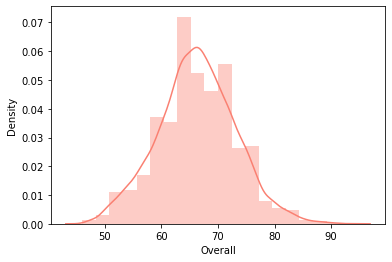

In [14]:
sns.distplot (fifa["Overall"],bins=20,color="salmon")
plt.show()

### pair plots for the following variables:
**Overall, Value, Wage, International Reputation, Height, Weight, Release Clause**


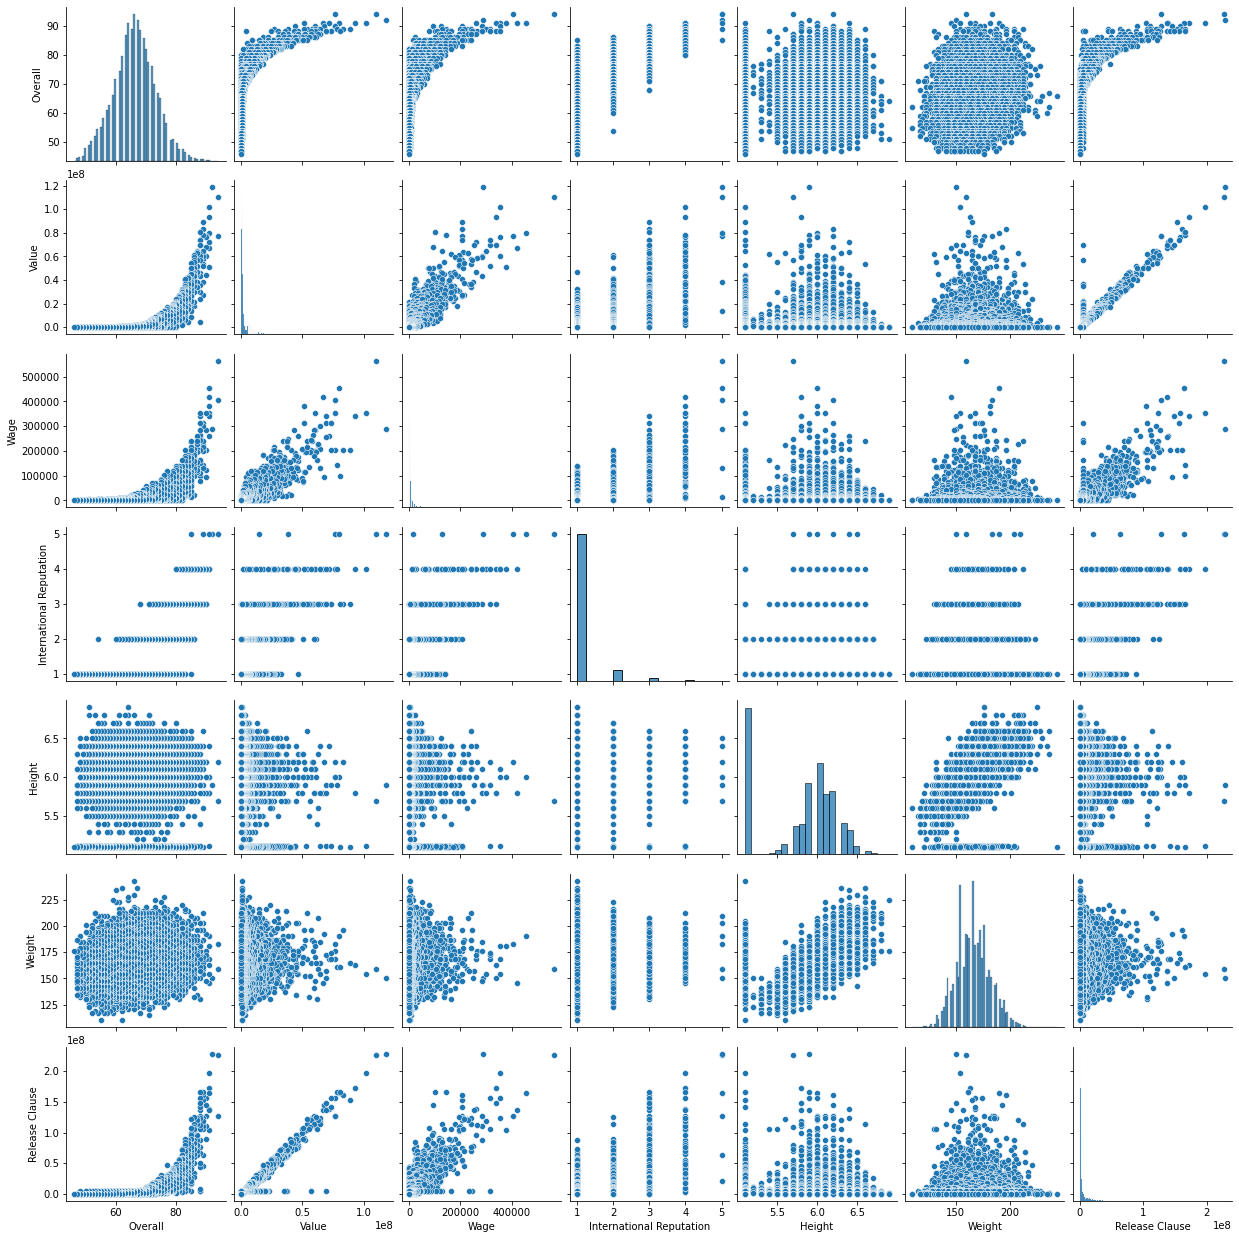

In [15]:
sns.pairplot(fifa[ ["Overall",'Value', 'Wage', 'International Reputation','Height',  'Weight','Release Clause' ]])
plt.show()

### Generating a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
    


In [16]:
fifa_20 =fifa[fifa["Contract Valid Until"]==2020].sort_values(by = "Overall" ,ascending=False) .reset_index(drop=True).iloc[:20]
fifa_20

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,193080,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
1,177003,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
2,155862,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
3,183277,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
4,168542,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
5,179813,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
6,138956,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
7,190460,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
8,164240,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
9,175943,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,3.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


##### Average wage 

In [17]:
fifa_20["Wage"].mean()

205450.0

#####  Average age

In [18]:
fifa_20["Age"].mean()

30.65

##### Correlation between Overall rating and Value 

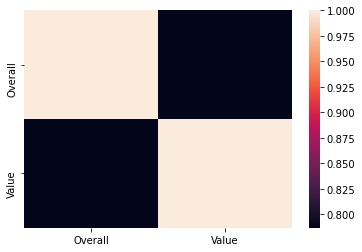

In [19]:
co= fifa_20[["Overall","Value"]].corr()
sns.heatmap(co)
plt.show()

### Generating tables containing the top 5 players by Overall rating for each unique position.

In [21]:
a=fifa["Position"].unique()
overall = pd.DataFrame( columns= fifa.columns)
temp = pd.DataFrame( columns= fifa.columns)
for i in a:
    temp=  fifa[fifa["Position"]==i].sort_values(by = "Overall" ,ascending=False).reset_index(drop=True).iloc[0:5,]
    overall= pd.concat([overall,temp])

##### Players appearing in more than one Table

There are no such players

In [22]:
overall["ID"].value_counts()[overall["ID"].value_counts()>1]

Series([], Name: ID, dtype: int64)

##### Average wage one can expect to pay for the top 5 in every position

In [23]:
overall.groupby(by="Position")["Wage"].mean()

Position
CAM        174000.0
CB         139600.0
CDM        217000.0
CF          47400.0
CM         130600.0
GK         192800.0
LAM         81600.0
LB         177200.0
LCB        162000.0
LCM        184400.0
LDM        126600.0
LF         121200.0
LM         164600.0
LS         130200.0
LW         261000.0
LWB         34200.0
RAM         45400.0
RB         155400.0
RCB        231000.0
RCM        240800.0
RDM        105000.0
RF         148000.0
RM         131400.0
RS         132200.0
RW         202000.0
RWB         44200.0
ST         294000.0
Unknown         0.0
Name: Wage, dtype: float64